# Install and Import Libraries

In [20]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install xgboost

In [22]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# ML algorithms
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

import catboost as cb

# Warnings off
import warnings
warnings.filterwarnings('ignore')

 # Load and Explore the Data

In [25]:
# Load dataset
df = pd.read_csv("Liver dataset_2.csv")

In [26]:
# Preview
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,36.0,Male,0.9,0.1,486.0,25.0,34.0,5.9,2.8,0.90,2
1,24.0,Female,0.7,0.2,188.0,11.0,10.0,5.5,2.3,0.71,2
2,48.0,Male,3.2,1.6,257.0,33.0,116.0,5.7,2.2,0.62,1
3,27.0,Male,1.2,0.4,179.0,63.0,39.0,6.1,3.3,1.10,2
4,74.0,Male,0.6,0.1,272.0,24.0,98.0,5.0,2.0,0.60,1
5,50.0,Male,5.8,3.0,661.0,181.0,285.0,5.7,2.3,0.67,2
6,50.0,Male,7.3,3.6,1580.0,88.0,64.0,5.6,2.3,0.60,2
7,48.0,Male,0.7,0.1,1630.0,74.0,149.0,5.3,2.0,0.60,1
8,32.0,Male,12.7,6.2,194.0,2000.0,2946.0,5.7,3.3,1.30,1
9,32.0,Male,15.9,7.0,280.0,1350.0,1600.0,5.6,2.8,1.00,1


# Basic Info & Descriptive Stats

In [28]:
# General info
print(" Dataset Overview:")
df.info()

# Descriptive stats
print("\n Descriptive Statistics:")
print(df.describe(include='all'))

# Check for nulls
print("\n🕳 Missing Values:")
print(df.isnull().sum())


 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1674 non-null   float64
 1   Gender                      1675 non-null   object 
 2   Total_Bilirubin             1663 non-null   float64
 3   Direct_Bilirubin            1652 non-null   float64
 4   Alkaline_Phosphotase        1651 non-null   float64
 5   Alamine_Aminotransferase    1657 non-null   float64
 6   Aspartate_Aminotransferase  1657 non-null   float64
 7   Total_Protiens              1651 non-null   float64
 8   Albumin                     1655 non-null   float64
 9   Albumin_and_Globulin_Ratio  1651 non-null   float64
 10  Dataset                     1675 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 144.1+ KB

 Descriptive Statistics:
                Age Gender  Total_Bilirubin

# Preprocessing the  Data

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male: 1, Female: 0

# Adjust target variable to binary: 1 = Disease, 0 = No Disease
df['Dataset'] = df['Dataset'].apply(lambda x: 1 if x == 1 else 0)

# Features and labels
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)


In [31]:
# Rename Dataset column to Target for clarity
df.rename(columns={'Dataset': 'Target'}, inplace=True)



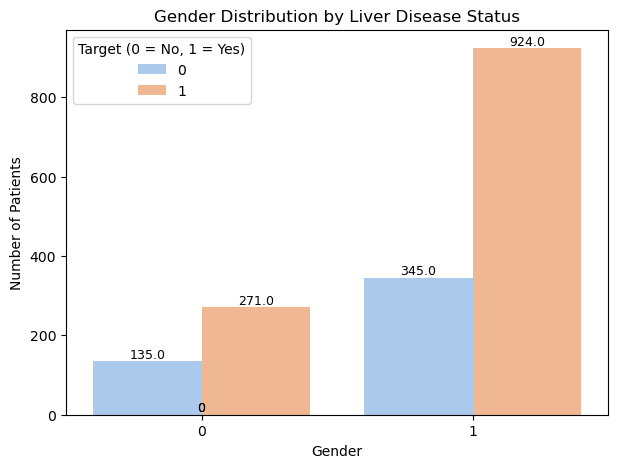

In [32]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Gender', hue='Target', data=df, palette='pastel')
plt.title('Gender Distribution by Liver Disease Status')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')

# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.legend(title='Target (0 = No, 1 = Yes)')
plt.show()


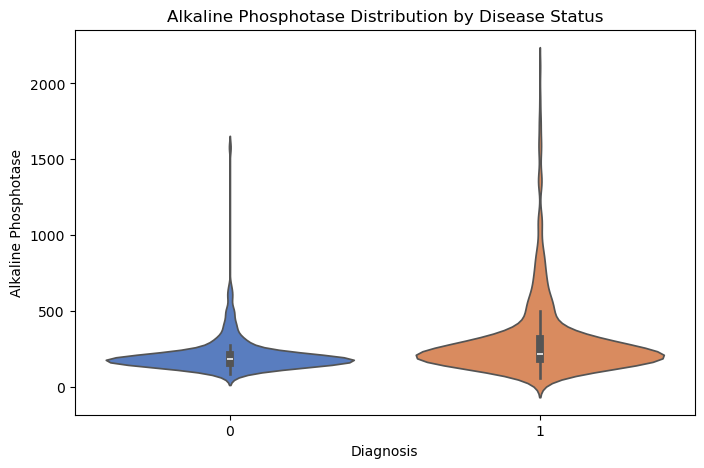

In [33]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Target', y='Alkaline_Phosphotase', data=df, palette='muted')
plt.title('Alkaline Phosphotase Distribution by Disease Status')
plt.xlabel('Diagnosis')
plt.ylabel('Alkaline Phosphotase')
plt.show()


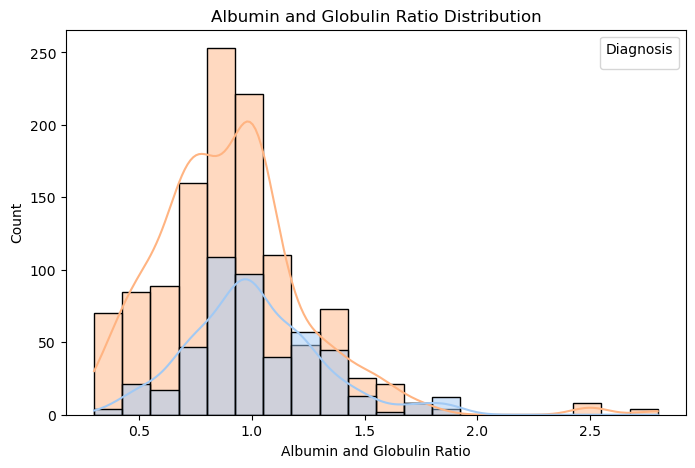

In [34]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Albumin_and_Globulin_Ratio', hue='Target', bins=20, kde=True, palette='pastel')
plt.title('Albumin and Globulin Ratio Distribution')
plt.xlabel('Albumin and Globulin Ratio')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()


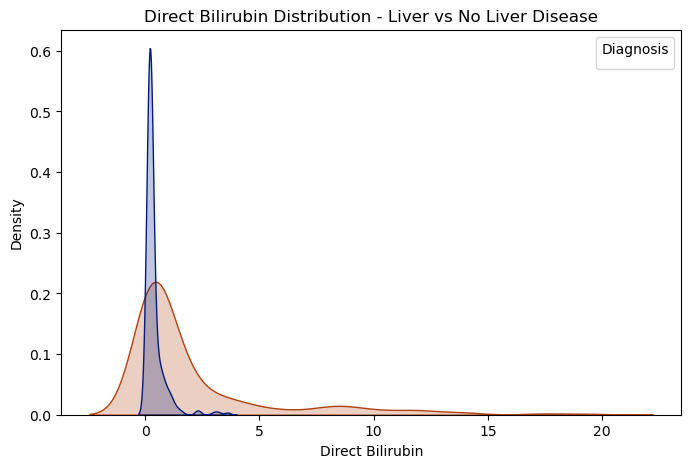

In [35]:
# Shows whether Direct Bilirubin levels are generally higher in patients with liver disease
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Direct_Bilirubin', hue='Target', fill=True, palette='dark')
plt.title('Direct Bilirubin Distribution - Liver vs No Liver Disease')
plt.xlabel('Direct Bilirubin')
plt.ylabel('Density')
plt.legend(title='Diagnosis')
plt.show()


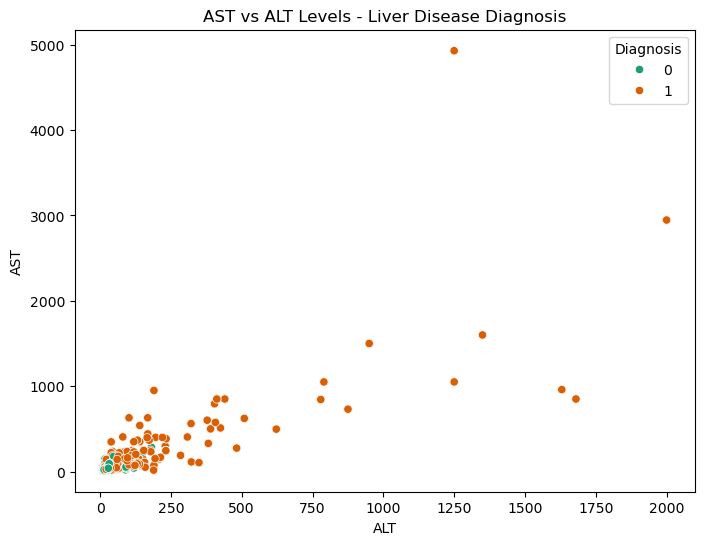

In [36]:
#Aspartate Aminotransferase (AST) vs ALT (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Alamine_Aminotransferase', y='Aspartate_Aminotransferase', hue='Target', palette='Dark2')
plt.title('AST vs ALT Levels - Liver Disease Diagnosis')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.legend(title='Diagnosis')
plt.show()


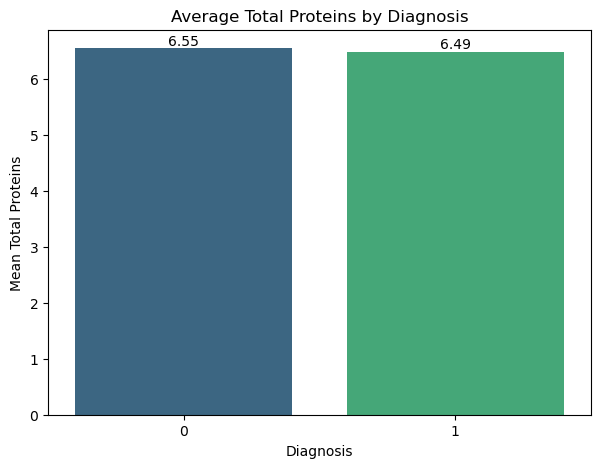

In [37]:
# Total Proteins by Diagnosis (Bar Plot with Means)
protein_means = df.groupby('Target')['Total_Protiens'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=protein_means, x='Target', y='Total_Protiens', palette='viridis')
plt.title('Average Total Proteins by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Total Proteins')
for index, row in protein_means.iterrows():
    plt.text(index, row.Total_Protiens + 0.05, round(row.Total_Protiens, 2), ha='center')
plt.show()


In [38]:
df.fillna(df.mean(), inplace=True)

#  Encode Categorical Variables (Gender)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [39]:
# Split Data into Features (X) and Target (y)
X = df.drop(['Target'], axis=1)
y = df['Target']

#  Split into Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
#  Scale the Data (standardize the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define and Train the Models

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

In [43]:
# Create an imputer to fill missing values
imputer = SimpleImputer(strategy='mean')  # You can change the strategy to 'median' or 'most_frequent'

# Initialize the models
gb_model = make_pipeline(imputer, GradientBoostingClassifier())
lgb_model = make_pipeline(imputer, lgb.LGBMClassifier())
cb_model = make_pipeline(imputer, CatBoostClassifier(silent=True))

# Train the models
gb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
cb_model.fit(X_train, y_train)

# Make predictions
gb_pred = gb_model.predict(X_test)
lgb_pred = lgb_model.predict(X_test)
cb_pred = cb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 953, number of negative: 387
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 1340, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.711194 -> initscore=0.901190
[LightGBM] [Info] Start training from score 0.901190


In [44]:
# Calculate accuracy scores for each model
gb_accuracy = accuracy_score(y_test, gb_pred)
lgb_accuracy = accuracy_score(y_test, lgb_pred)
cb_accuracy = accuracy_score(y_test, cb_pred)

# Print the accuracy scores
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print(f"LightGBM Accuracy: {lgb_accuracy:.4f}")
print(f"CatBoost Accuracy: {cb_accuracy:.4f}")

# Classification Reports for each model
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))
print("\nLightGBM Classification Report:\n", classification_report(y_test, lgb_pred))
print("\nCatBoost Classification Report:\n", classification_report(y_test, cb_pred))

Gradient Boosting Accuracy: 0.8358
LightGBM Accuracy: 0.9642
CatBoost Accuracy: 0.9284

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.58      0.66        93
           1       0.85      0.93      0.89       242

    accuracy                           0.84       335
   macro avg       0.81      0.76      0.78       335
weighted avg       0.83      0.84      0.83       335


LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        93
           1       0.97      0.98      0.98       242

    accuracy                           0.96       335
   macro avg       0.96      0.95      0.95       335
weighted avg       0.96      0.96      0.96       335


CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86        93
           1       0.93      0.98      

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, accuracy_score
from tabulate import tabulate
import numpy as np

# Calculate the metrics for each model
metrics = {
    "Model": ["Gradient Boosting", "LightGBM", "CatBoost"],
    "Accuracy": [
        accuracy_score(y_test, gb_pred),
        accuracy_score(y_test, lgb_pred),
        accuracy_score(y_test, cb_pred),
    ],
    "Precision": [
        precision_score(y_test, gb_pred),
        precision_score(y_test, lgb_pred),
        precision_score(y_test, cb_pred),
    ],
    "Recall": [
        recall_score(y_test, gb_pred),
        recall_score(y_test, lgb_pred),
        recall_score(y_test, cb_pred),
    ],
    "F1-Score": [
        f1_score(y_test, gb_pred),
        f1_score(y_test, lgb_pred),
        f1_score(y_test, cb_pred),
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, cb_model.predict_proba(X_test)[:, 1]),
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, gb_pred)),
        np.sqrt(mean_squared_error(y_test, lgb_pred)),
        np.sqrt(mean_squared_error(y_test, cb_pred)),
    ]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the metrics in a readable table format using tabulate
print(tabulate(metrics_df, headers="keys", tablefmt="grid", showindex=False))


+-------------------+------------+-------------+----------+------------+-----------+----------+
| Model             |   Accuracy |   Precision |   Recall |   F1-Score |   ROC-AUC |     RMSE |
+===================+============+=============+==========+============+===========+==========+
| Gradient Boosting |   0.835821 |    0.85283  | 0.933884 |   0.891519 |  0.89585  | 0.40519  |
+-------------------+------------+-------------+----------+------------+-----------+----------+
| LightGBM          |   0.964179 |    0.96748  | 0.983471 |   0.97541  |  0.976851 | 0.189264 |
+-------------------+------------+-------------+----------+------------+-----------+----------+
| CatBoost          |   0.928358 |    0.929134 | 0.975207 |   0.951613 |  0.961299 | 0.26766  |
+-------------------+------------+-------------+----------+------------+-----------+----------+


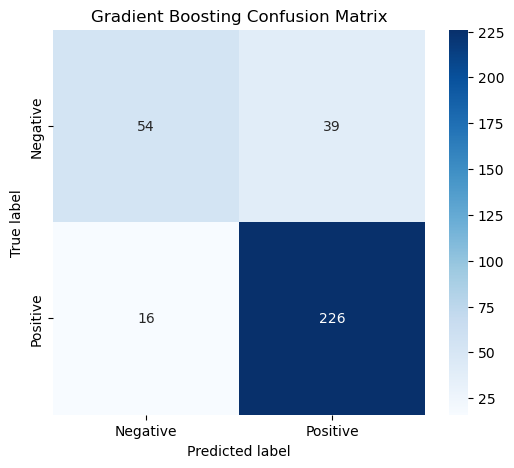

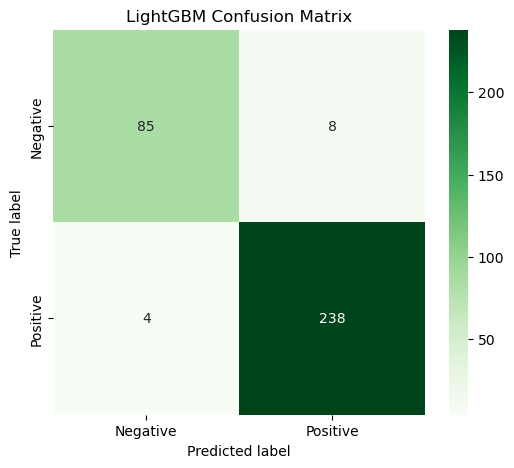

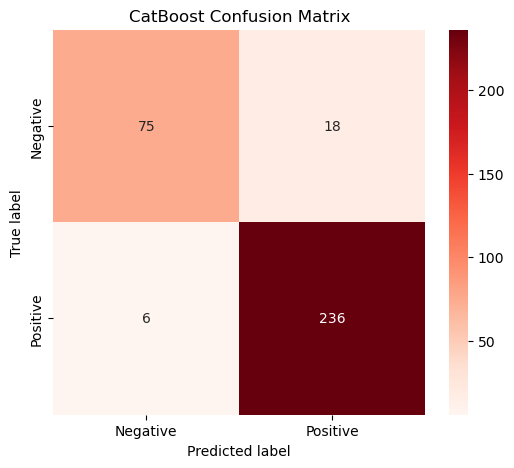

In [46]:
# Assuming models are trained and predictions are made
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix with different colors for each model
def plot_confusion_matrix(y_true, y_pred, model_name, color_map):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=color_map, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot Confusion Matrices for each model with different colors
plot_confusion_matrix(y_test, gb_pred, 'Gradient Boosting', 'Blues')
plot_confusion_matrix(y_test, lgb_pred, 'LightGBM', 'Greens')
plot_confusion_matrix(y_test, cb_pred, 'CatBoost', 'Reds')


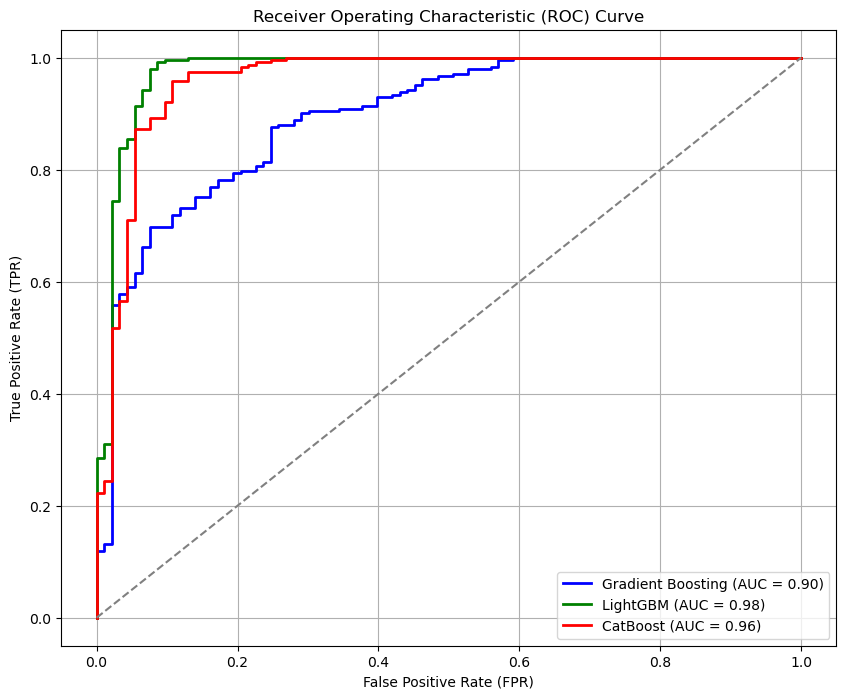

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve for each model
def plot_roc_curve(y_true, y_prob, model_name, color):
    # Get the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)  # Calculate the area under the curve
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Assuming you have already trained the models and got their probability predictions
# For Gradient Boosting, LightGBM, and CatBoost models, use predict_proba to get probabilities
# X_test is your test set, and y_test is the true labels for evaluation

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))

# Gradient Boosting ROC Curve
plot_roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1], 'Gradient Boosting', 'blue')

# LightGBM ROC Curve
plot_roc_curve(y_test, lgb_model.predict_proba(X_test)[:, 1], 'LightGBM', 'green')

# CatBoost ROC Curve
plot_roc_curve(y_test, cb_model.predict_proba(X_test)[:, 1], 'CatBoost', 'red')

# Plot Random Classifier (Diagonal Line) for reference
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()
